In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo

In [28]:
import json
tiempo = ["2025-01-01", "2025-03-31"]
# tiempo = ["2023-01-01", "2023-03-31"]
AmatitlanGeo = {}
AtitlanGeo = {}

# Read first file
with open("./data/Lago_Amatitlan.geojson", "r", encoding="utf-8") as f:
    AmatitlanGeo = json.load(f)

# Read second file
with open("./data/Lago_Atitlan.geojson", "r", encoding="utf-8") as f:
    AtitlanGeo = json.load(f)

print(type(AmatitlanGeo))
print(type(AtitlanGeo))

<class 'dict'>
<class 'dict'>


In [25]:
lago_atitlan = {
"west": -91.326256,
"east": -91.07151,
"south": 14.5948,
"north": 14.750979
}

lago_amatitlan = {
"west": -90.638065,
"east": -90.512924,
"south": 14.412347,
"north": 14.493799
}

In [3]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [32]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,  # Región de Guatemala
    temporal_extent=tiempo,
)

In [33]:
import requests

url = "https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/cyanobacteria_chla_ndci_l1c/script.js"
response = requests.get(url)

evalscript = response.text

In [ ]:
result_graph = atitlan_cube.save_result(
    format="GTIFF",
    options={"evalscript": evalscript}
)
# cianobacteria_atitlan.tif

In [ ]:
job = connection.create_job(result_graph)
job.start_and_wait()
job.download_results("./data/GIS/cianobacteria_atitlan.tif")

Preflight process graph validation failed: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


0:00:00 Job 'j-2508080454164f30901d54ed3a9a8065': send 'start'
0:00:13 Job 'j-2508080454164f30901d54ed3a9a8065': created (progress 0%)
0:00:18 Job 'j-2508080454164f30901d54ed3a9a8065': created (progress 0%)
0:00:25 Job 'j-2508080454164f30901d54ed3a9a8065': created (progress 0%)
0:00:33 Job 'j-2508080454164f30901d54ed3a9a8065': created (progress 0%)
0:00:46 Job 'j-2508080454164f30901d54ed3a9a8065': created (progress 0%)
0:00:58 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:01:14 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:01:33 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:01:57 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:02:27 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:03:05 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:03:52 Job 'j-2508080454164f30901d54ed3a9a8065': running (progress N/A)
0:04:50 Job 'j-2508080454164f30901d54ed3a9a8065': running (progres

C:\Users\Gerax\AppData\Local\Temp\ipykernel_12640\2288808179.py:3: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("./data/GIS/")


KeyboardInterrupt: 

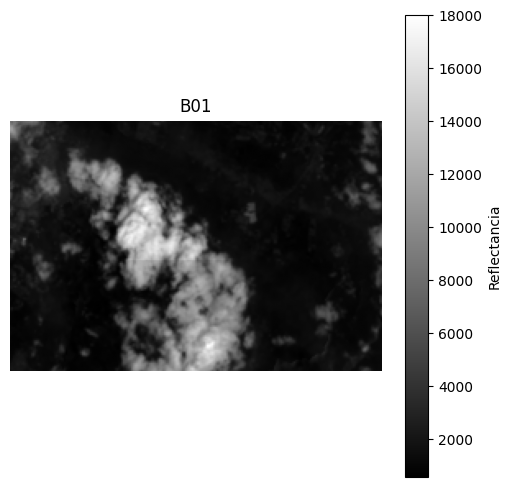

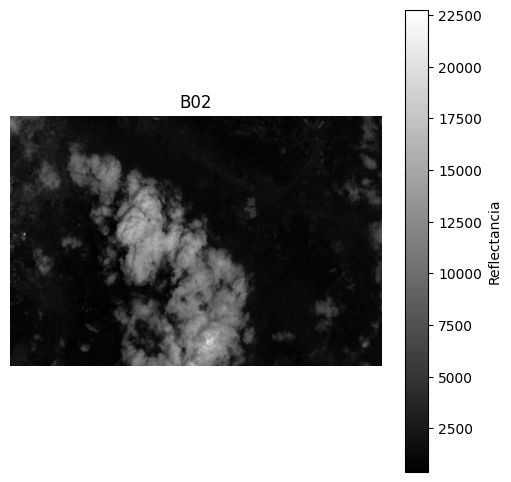

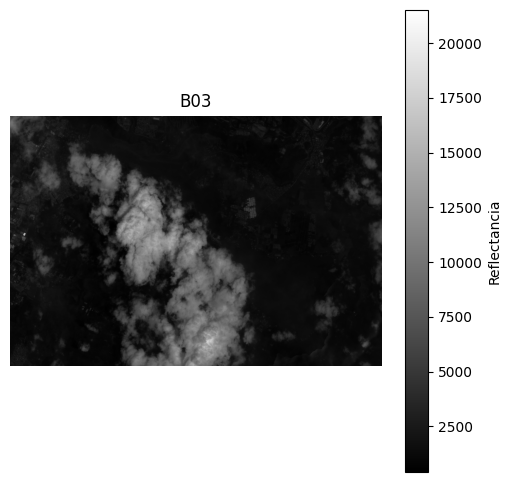

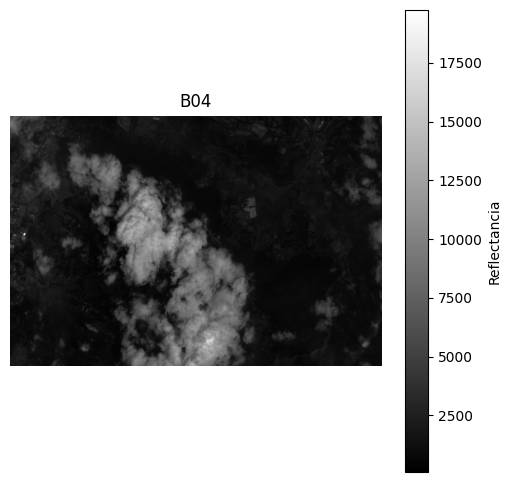

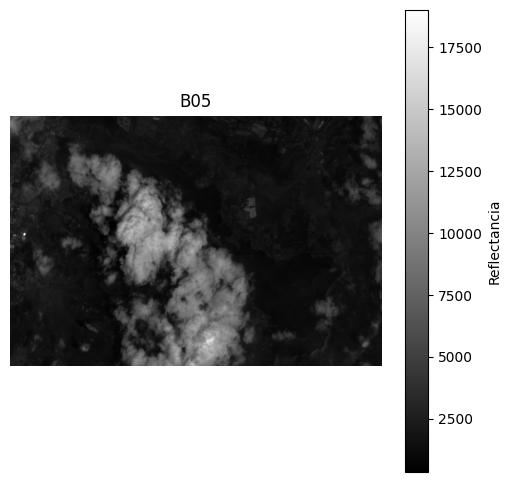

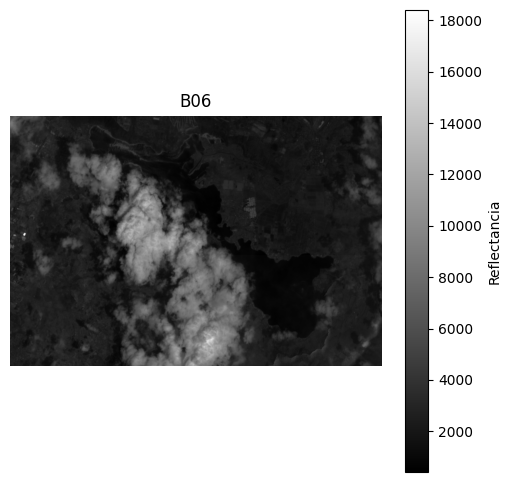

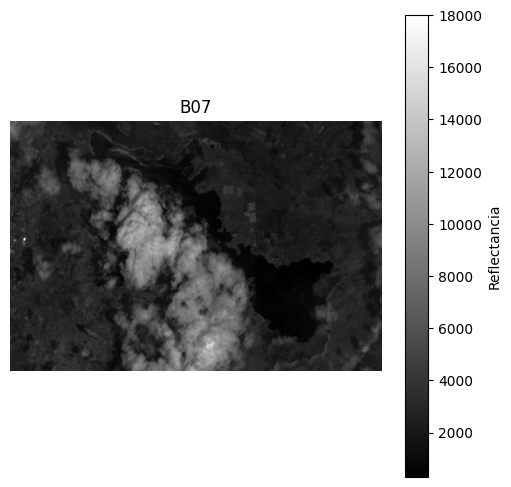

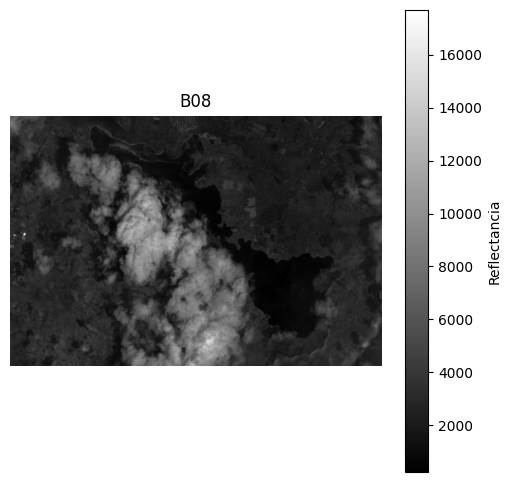

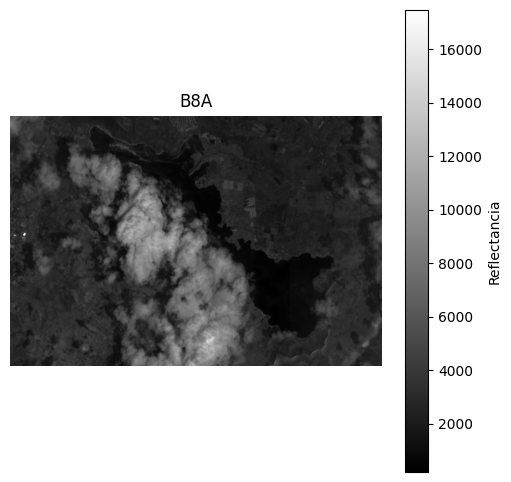

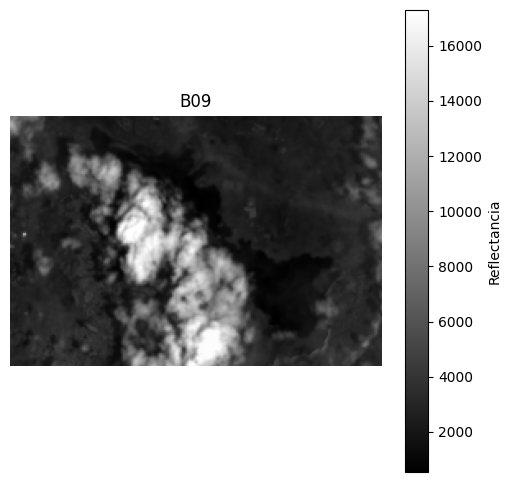

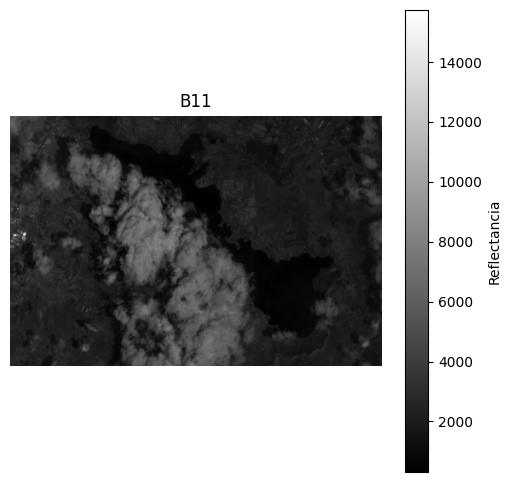

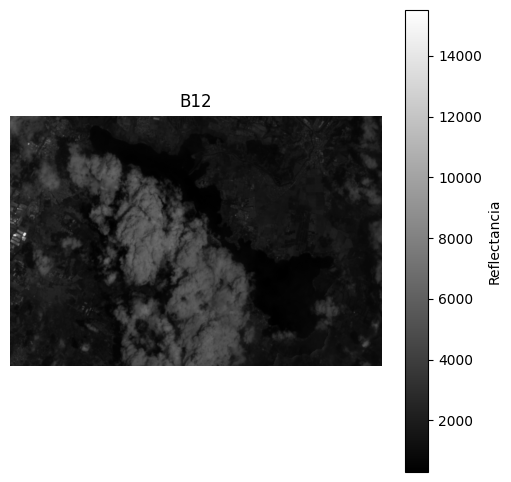

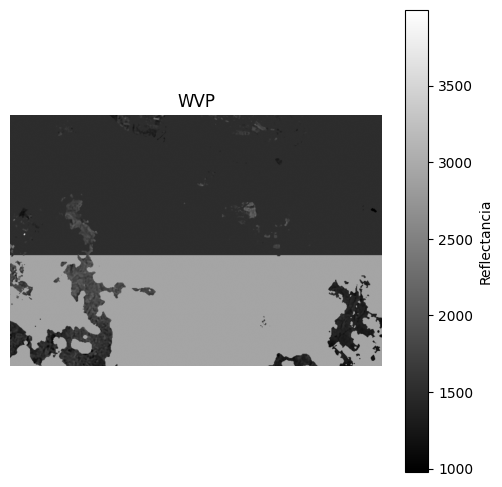

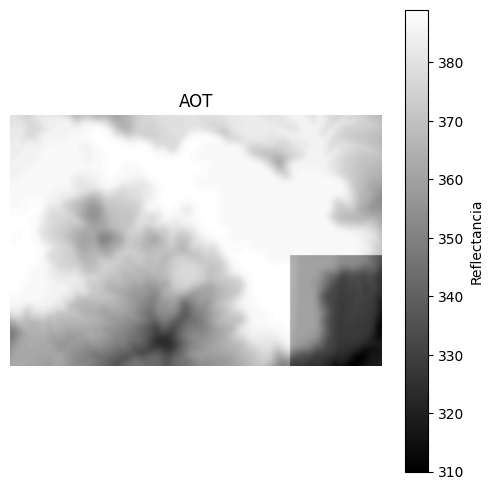

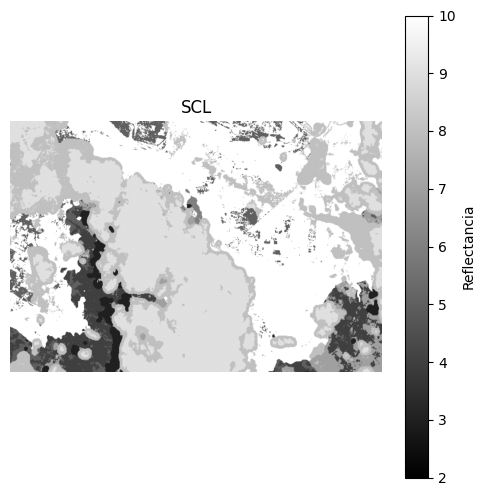

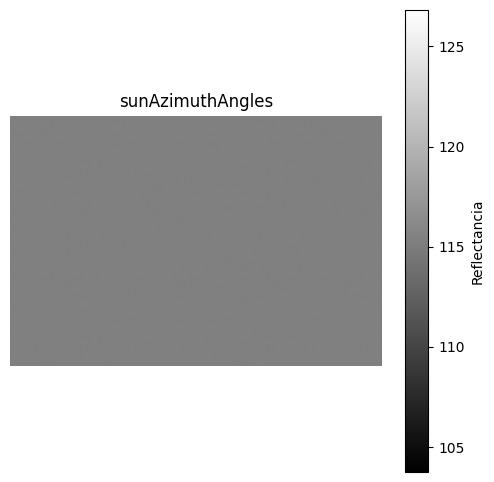

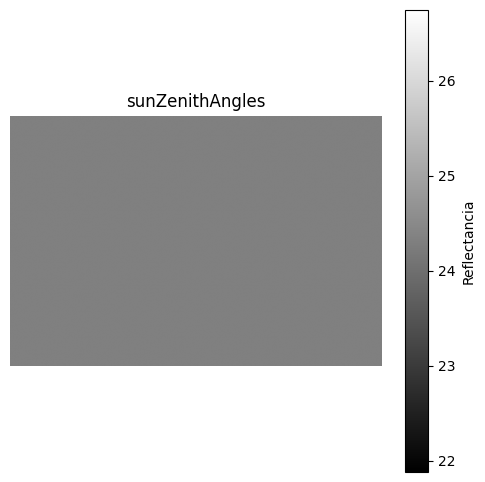

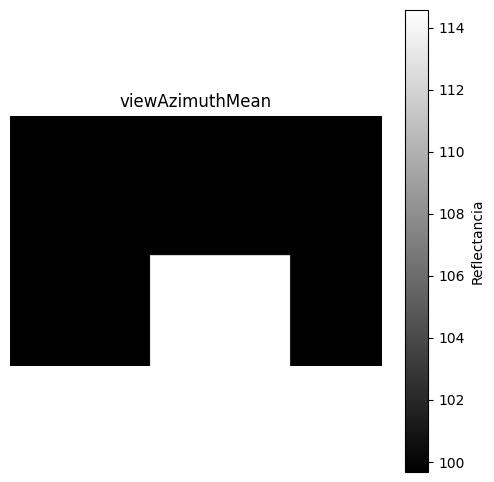

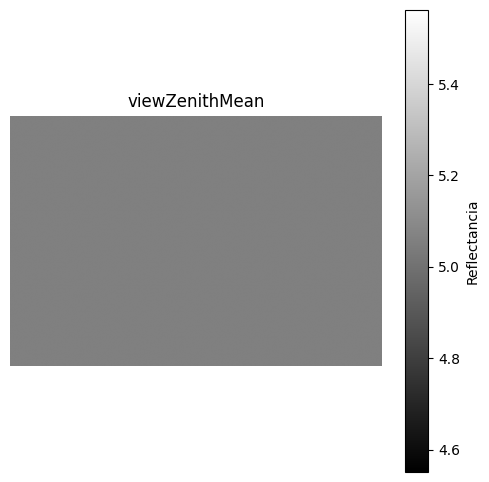

In [37]:
ruta_tif = "./data/GIS/cianobacteria_amatitlan.tif"

with rasterio.open(ruta_tif) as src:
    bandas = src.read()  # Lee todas las bandas
    nombres = src.descriptions if src.descriptions[0] else [f"Banda {i+1}" for i in range(src.count)]
    nodata = src.nodata

# Visualizar bandas individuales
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6, 6))
    img = bandas[i]
    img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap='gray')
    plt.title(f"{nombres[i]}")
    plt.axis('off')
    plt.colorbar(label="Reflectancia")
    plt.show()

In [5]:
import json
timeRange = ["2025-01-01", "2025-01-10"]
AmatitlanGeo = {}
AtitlanGeo = {}

# Read first file
with open("./data/Lago_Amatitlan.geojson", "r", encoding="utf-8") as f:
    AmatitlanGeo = json.load(f)

# Read second file
with open("./data/Lago_Atitlan.geojson", "r", encoding="utf-8") as f:
    AtitlanGeo = json.load(f)

lago_atitlan = {
"west": -91.326256,
"east": -91.07151,
"south": 14.5948,
"north": 14.750979
}

lago_amatitlan = {
"west": -90.638065,
"east": -90.512924,
"south": 14.412347,
"north": 14.493799
}

amatitlan_tc = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_amatitlan,
    temporal_extent=timeRange,
)

# For example, export to local GeoTIFF files, one per timestamp
output_dir = "./data/Amatitlan2/"

# Save result as collection of GeoTIFF files
result = amatitlan_tc.save_result(format="Gtiff")
job = result.create_job(title="Download second")
job.get_results().download_files(output_dir)
print(f"Downloaded {job.get_file_names()} to {output_dir}")

OpenEoApiError: [400] JobNotFinished: Batch job has not finished computing the results yet. Please try again later or contact our support. (ref: r-2508090215084c79855c29bc8e0e79ef)